In [5]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

## Plot Origin FSD

In [17]:
def draw_flow_size_distribution(fileNames):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    
    for fileName in fileNames: 
        print(fileName)
        flow_size = []
        frequency = []
        total_packets = 0
    
        with open(fileName, "r") as file:
            for line in file:
                items = line.strip().split(" ")
                flow_size.append(int(items[0]))
                frequency.append(int(items[1]))
                total_packets += int(items[0])*int(items[1])
            
            
        # Calculate mean and variance
        flow_sizes_array = np.array(flow_size)
        frequencies_array = np.array(frequency)

        mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
        variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
        # print("Mean Flow Size:", mean_flow_size)
        # print("Variance of Flow Size:", variance_flow_size)
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        print("Total Flows: ", total_flows)
        print("Total Packets: ", total_packets)
        print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(fileName.split("/")[-1][:-4])
    
    linestyles = ['--', '-.', ':', '-', '--', '-.', ':','--', '-.', ':']
    colors = {'caida': 'tab:orange', 'zipf1': 'tab:blue', 'zipf2':'tab:green'}
    
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    
    for i in range(len(fs)):
        plt.plot(fs[i], prob[i], linestyle=linestyles[i], label = labels[i], color=colors[labels[i].split("-")[0]])
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle=linestyles[i], label = labels[i], color=colors[labels[i].split("-")[0]])
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
# draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida-50w.txt
Total Flows:  10775
Total Packets:  545993
Density:  50
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida-125w.txt
Total Flows:  26938
Total Packets:  1254001
Density:  46
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida-250w.txt
Total Flows:  53878
Total Packets:  2441598
Density:  45
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida-500w.txt
Total Flows:  107755
Total Packets:  5061345
Density:  46
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/zipf2-50w.txt
Total Flows:  35884
Total Packets:  522966
Density:  14
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/zipf2-125w.txt
Total Flows:  89711
Total Packets:  1182227
Density:  13
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/zipf2-250w.txt
Total Flows:  179423
Total Packets:  2

/tmp/ipykernel_31894/3452725180.py:66: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_31894/3452725180.py:80: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


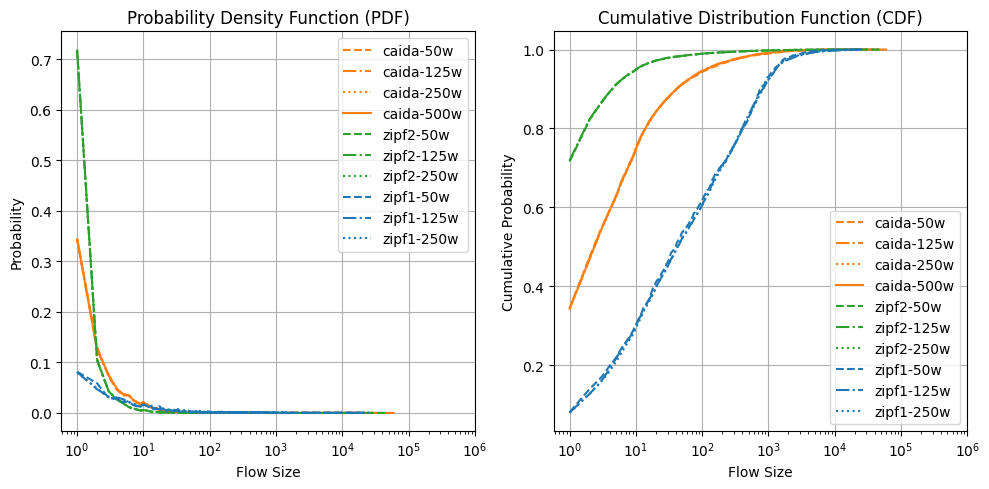

In [18]:
pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
file_names = ["caida-50w", "caida-125w", "caida-250w", "caida-500w", "zipf2-50w", "zipf2-125w", "zipf2-250w", "zipf1-50w", "zipf1-125w", "zipf1-250w"]
pcap_file = []
for file_name in file_names:
    file_path = pcap_folder + file_name + ".txt"
    pcap_file.append(file_path)
    
# for file in pcap_file:
#     draw_flow_size_distribution(file)
#     break

draw_flow_size_distribution(pcap_file)
# draw_flow_size_distribution([pcap_file[1], pcap_file[6], pcap_file[9], ])
# draw_flow_size_distribution(pcap_file[:3])
# draw_flow_size_distribution(pcap_file[3:6])
# draw_flow_size_distribution(pcap_file[6:9])
# draw_flow_size_distribution(pcap_file[9:12])
# draw_flow_size_distribution(pcap_file[12:15])
